<a href="https://colab.research.google.com/github/SachinRajput28/Sachin_project/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Zomato data .csv')

In [ ]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


#Aprrox cost of two people.

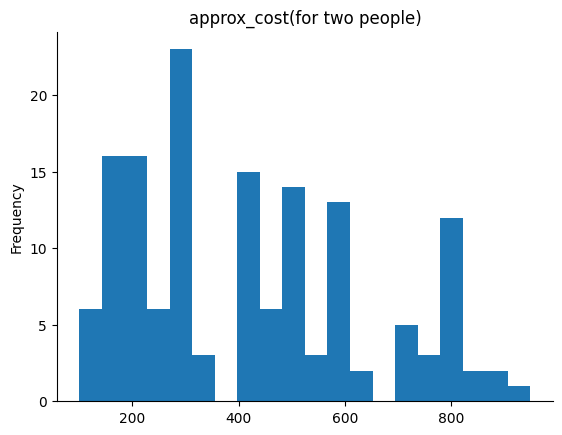

In [ ]:
from matplotlib import pyplot as plt
df['approx_cost(for two people)'].plot(kind='hist', bins=20, title='approx_cost(for two people)')
plt.gca().spines[['top', 'right',]].set_visible(False)

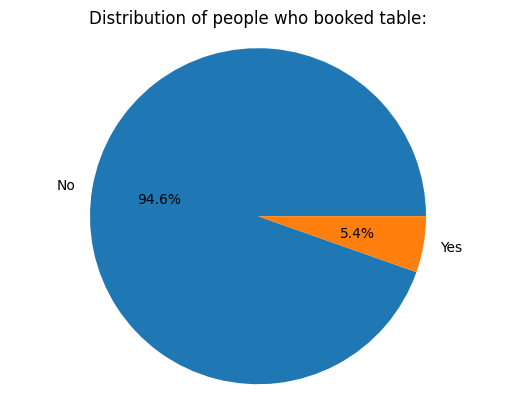

In [ ]:
book_table_count = df['book_table'].value_counts()
plt.pie(book_table_count, labels=book_table_count.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
_ = plt.title('Distribution of people who booked table:')

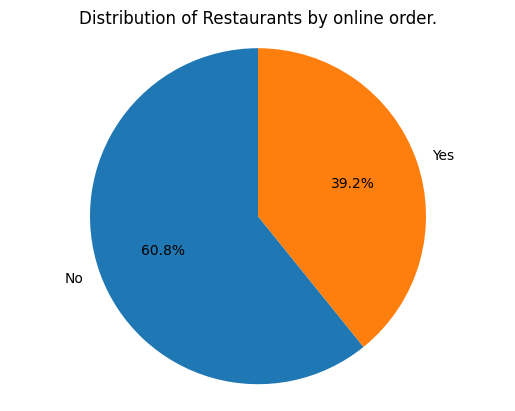

In [ ]:
online_order_counts = df['online_order'].value_counts()
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%',startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
_ = plt.title('Distribution of Restaurants by online order.')

In [ ]:
df.isnull().sum()


,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [ ]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


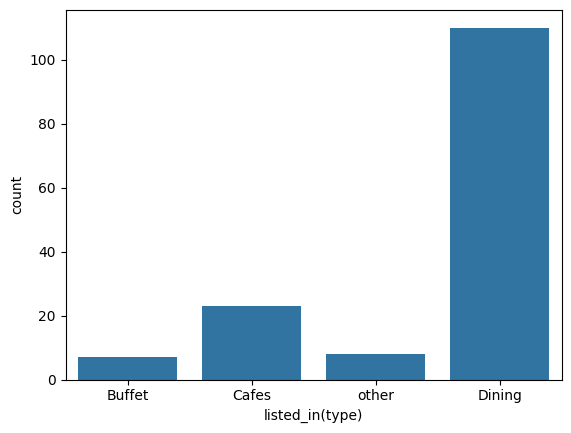

In [ ]:
sns.countplot(x=df['listed_in(type)'])
plt.show()

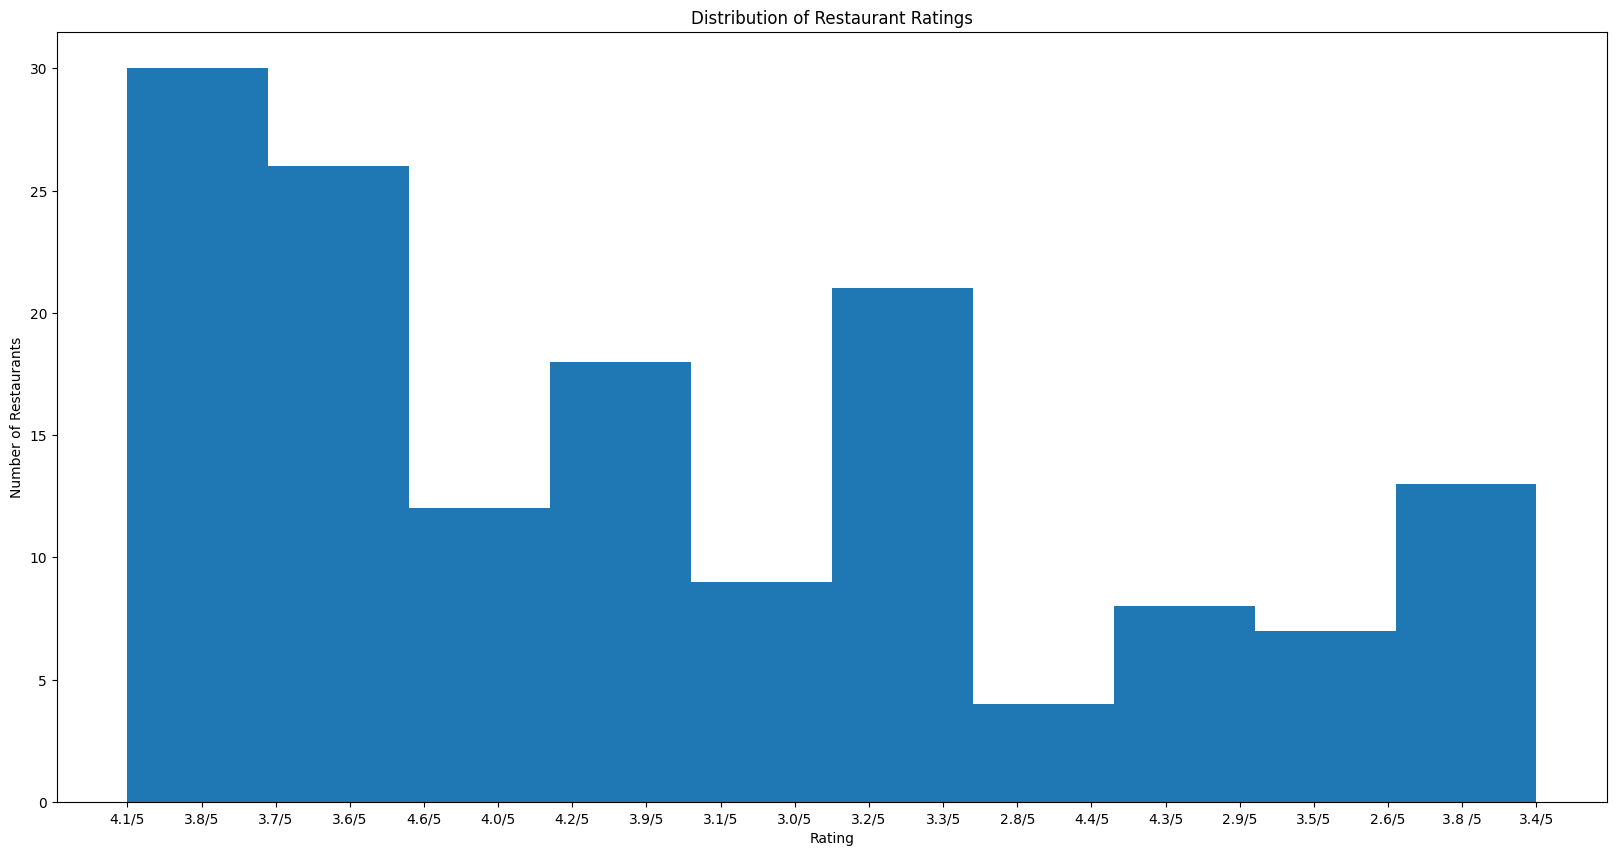

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(df['rate'], bins= 10)
plt.xlabel('Rating',)
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Ratings')
plt.show()

# Conclusion - The majority restaurants received rating from 3.7 to 4.1


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

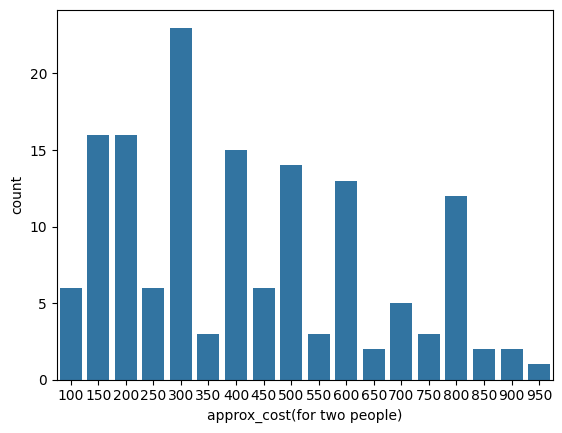

In [ ]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## **The Majority of couple prefer restaurant within approx cost of 300 rupees**


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

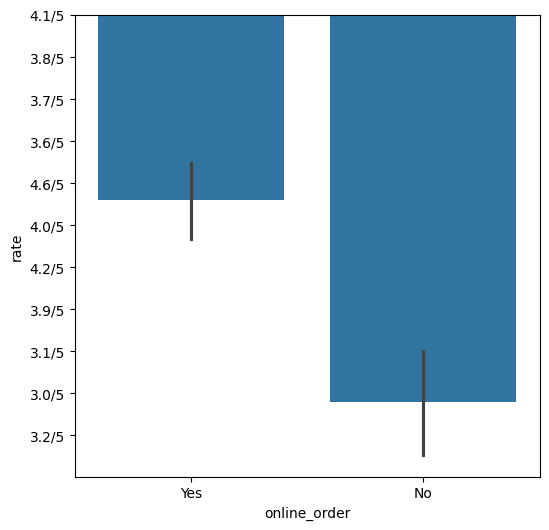

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x='online_order', y='rate', data= df)

# Offline order received lower rating from online

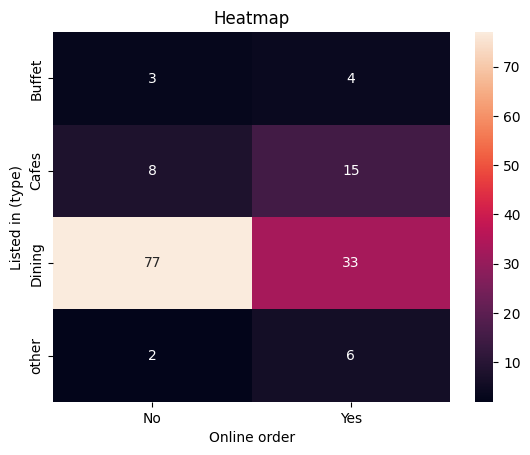

In [ ]:
pivot_table= df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Listed in (type)')
plt.show()

# Dining restaurant primarly recive offline order and cafes recieve online order more. This suggest client prefer restaurant in offline ordering but in cafes client prefer online order.